<a href="https://colab.research.google.com/github/thuanlam92/Thuan_INFO5731_Spring2020/blob/master/INFO5731_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**
(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 

In [0]:
#source: https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
#source: https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc
#source: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/


In [0]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens
    


In [0]:
import random
text_data = []
with open('Assignment4_data.csv') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        print(tokens)
text_data.append(tokens)

['person', 'claim', 'masterpiece', 'overreact', 'overblown', 'excitement', 'another', 'joker', 'base', 'thought', 'look', 'solid', 'pretentious', 'trailer', 'incredibly', 'wrong', 'massive', 'achievement', 'cinema', 'extremely', 'nonsense', 'reboot', 'somewhat', 'reboot', 'sort', 'standalone', 'origin', 'impeccable', 'start', 'finish', 'echo', 'resemblance', 'joker', 'origin', 'comic_strip', 'joaquin', 'bleed', 'sweats', 'cry', 'every', 'magnificently', 'dedicate', 'performance', 'heath', 'ledger', 'would', 'proud', 'undoubtedly', 'greatest', 'acting', 'performance', 'since', 'heath', 'joker', 'direct', 'writing', 'slickly', 'brilliant', 'bleak', 'setting', 'tone', 'palpable', 'throughout', 'place', 'blow', 'every', 'audience', 'member', 'awestruck', 'witness', 'could', 'still', 'transport', 'character', 'world', 'existence', 'believe', 'going', 'revere', 'transcend', 'masterpiece', 'cinema', 'every', 'movie', 'come', 'truly', 'make', 'impact', 'joaquins', 'performance', 'scenography',

In [0]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.038*"oscar" + 0.038*"actor" + 0.038*"big" + 0.038*"original"')
(1, '0.038*"oscar" + 0.038*"joker" + 0.038*"positive" + 0.038*"original"')
(2, '0.038*"oscar" + 0.038*"joker" + 0.038*"positive" + 0.038*"original"')
(3, '0.038*"joker" + 0.038*"actor" + 0.038*"oscar" + 0.038*"positive"')
(4, '0.038*"original" + 0.038*"actor" + 0.038*"makeup" + 0.038*"positive"')
(5, '0.066*"joker" + 0.066*"oscar" + 0.066*"actor" + 0.035*"definitely"')
(6, '0.038*"oscar" + 0.038*"joker" + 0.038*"positive" + 0.038*"original"')
(7, '0.039*"actor" + 0.039*"oscar" + 0.039*"joker" + 0.039*"big"')
(8, '0.038*"oscar" + 0.038*"actor" + 0.038*"makeup" + 0.038*"positive"')
(9, '0.038*"oscar" + 0.038*"actor" + 0.038*"makeup" + 0.038*"positive"')


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [0]:
pip install pyLDAvis

In [0]:
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


The distance between topics shows the semantic relationship between them. The closer the are to each other, the more seematically related they are. 

#**Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: 80% data for training and 20% data for testing.

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.


In [0]:
#source: https://monkeylearn.com/text-analysis/

import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
reviews = pd.read_csv("Assignment4_data.csv")


#the set contains reviews only, column 2 has the content, column 3 has the sentiment. 
#pandas columns follow zero-based indexing scheme where the first column is called 0th 
content = reviews.iloc[:, 1].values
labels = reviews.iloc[:, 2].values

In [0]:
vectorizer = TfidfVectorizer()
vectorized_reviews = vectorizer.fit_transform(content)

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(vectorized_reviews, labels, test_size=0.2, random_state=0)

In [91]:
#Method 1: Random Forest algorithm because of its ability to act upon non-normalized data.
#source: https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train, y_train)

predictions = text_classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 2 0 1]]
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         1
    Positive       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00         1
    positive       1.00      0.33      0.50         3

    accuracy                           0.20         5
   macro avg       0.25      0.08      0.12         5
weighted avg       0.60      0.20      0.30         5

0.2


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
#Method 2 Logistic regression  uses a logistic function to model a binary variable based on any kind of independent variables

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

0.6

In [93]:
#Method 3 Support vector machines is flexible - they can do linear classification, but can use other non-linear basis functions. 
from sklearn import svm
SVM = svm.SVC(decision_function_shape="ovo").fit(x_train, y_train)
SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)

0.6

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [0]:
houses_train = pd.read_csv("train.csv")
houses_train.head()

houses_test = pd.read_csv("test.csv")
houses_test.head()


In [60]:
houses_train.describe() #summary statistics of numeric variables

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


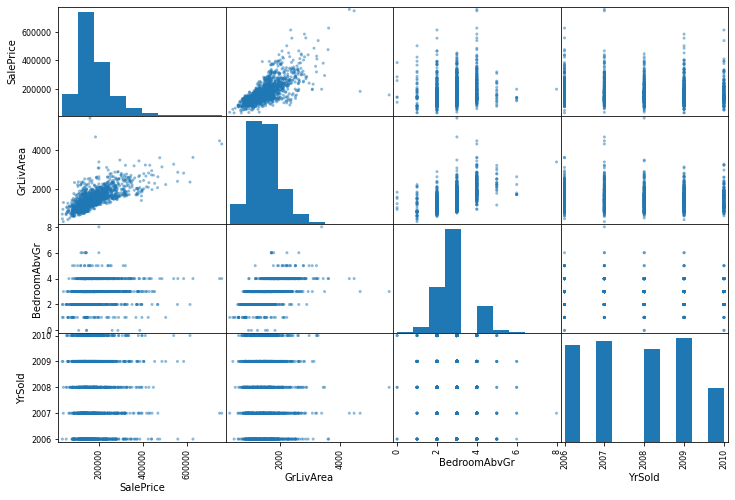

In [30]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "GrLivArea", "BedroomAbvGr", "YrSold"]
scatter_matrix(houses_train[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

#most promising variable for predicting the last SalePrice is the GrLivArea

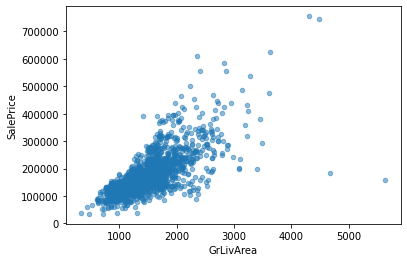

In [36]:
houses_train.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)
plt.savefig('scatter.png')

#correlation is strong: the upward trend, points are not too dispersed.

In [0]:
# create x and y
feature_cols = 'GrLivArea' 
x = houses_train[feature_cols] # predictor
y = houses_train.SalePrice # response



In [0]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2) 
# the test set will be 20% of the whole data set


x_train= x_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)



In [55]:
#fit
linreg = LinearRegression()
linreg.fit(x_train, y_train)

print (linreg.intercept_)
print (linreg.coef_)

[12502.73940675]
[[111.27339698]]


for an increasee of 1 sqft of ground living area, the price will go up by $111.27


from this, our model is: 
price = 12502.74 + 111.27 * x

In [58]:
#R squared coefficient
linreg.score(x_test,y_test)

#R squared coefficient = 38 % 
#meaning that our model is only able to explain 38% of the variability in house prices

0.3837216964654493

Hi professor, a quick note for you. So for this assignment, I could have achieved better results if I had more reviews. But because I didnt collect enough reviews so the results don't look so good. I believe the methods are right though. I'll work on automatically collecting the top 100 reviews over the summer :)